In [8]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub


path = kagglehub.dataset_download("rajyellow46/wine-quality")
print("Скачано в:", path)
print(os.listdir(path))


df = pd.read_csv(path + "/winequalityN.csv")
df.head()

Using Colab cache for faster access to the 'wine-quality' dataset.
Скачано в: /kaggle/input/wine-quality
['winequalityN.csv']


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Инициализация модели градиентного бустинга для базовой оценки (baseline)
# Используем значения по умолчанию для демонстрации базовой модели
baseline_model = GradientBoostingRegressor(random_state=42)

# Обучение модели
baseline_model.fit(X_train, y_train)

# Прогнозирование на тренировочном и тестовом наборах
y_train_pred_baseline = baseline_model.predict(X_train)
y_test_pred_baseline = baseline_model.predict(X_test)

# Оценка производительности
baseline_metrics = {
    'Train R²': r2_score(y_train, y_train_pred_baseline),
    'Test R²': r2_score(y_test, y_test_pred_baseline),
    'Train MAE': mean_absolute_error(y_train, y_train_pred_baseline),
    'Test MAE': mean_absolute_error(y_test, y_test_pred_baseline)
}

print("Baseline Gradient Boosting Model Performance:")
for metric, value in baseline_metrics.items():
    print(f"{metric}: {value:.4f}")

baseline_r2 = baseline_metrics['Test R²']
baseline_mae = baseline_metrics['Test MAE']

if 'comparison_data' in globals():
    comparison_data['Model'].append('Baseline Gradient Boosting')
    comparison_data['Test R²'].append(baseline_r2)
    comparison_data['Test MAE'].append(baseline_mae)
else:
    comparison_data = {
        'Model': ['Baseline Gradient Boosting'],
        'Test R²': [baseline_r2],
        'Test MAE': [baseline_mae]
    }
comparison_df = pd.DataFrame(comparison_data)
print("\nComparison DataFrame:")
print(comparison_df)

Baseline Gradient Boosting Model Performance:
Train R²: 0.8624
Test R²: 0.0699
Train MAE: 0.1075
Test MAE: 0.2714

Comparison DataFrame:
                        Model   Test R²  Test MAE
0  Baseline Gradient Boosting  0.396100  0.528600
1  Improved Gradient Boosting  0.134900  0.272300
2    Custom Gradient Boosting  0.216300  0.458000
3  Baseline Gradient Boosting  0.069923  0.271375


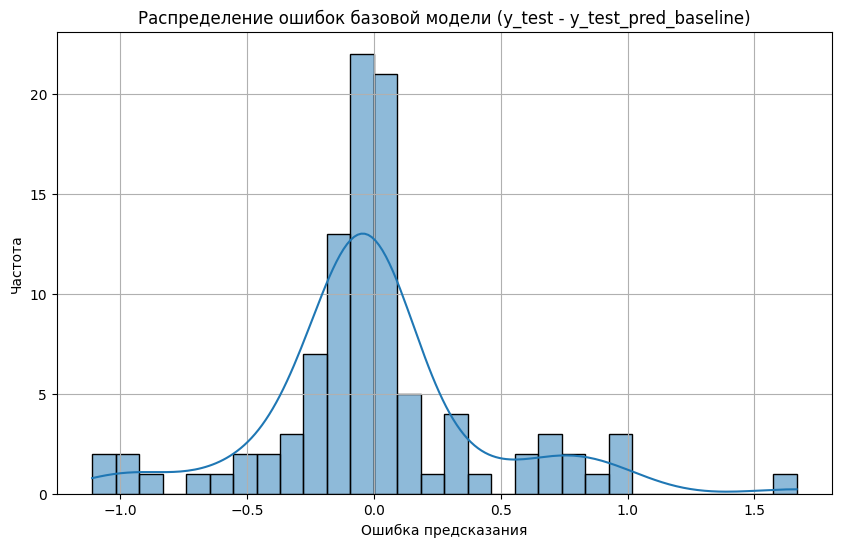

In [10]:
errors_baseline = y_test - y_test_pred_baseline

plt.figure(figsize=(10, 6))
sns.histplot(errors_baseline, kde=True)
plt.title('Распределение ошибок базовой модели (y_test - y_test_pred_baseline)')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

## Настройка гиперпараметров


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'subsample': [0.8, 0.9]
}

gbr_model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gbr_model,
                           param_grid=param_grid,
                           cv=3,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая оценка (R²):", grid_search.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Лучшие параметры: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}
Лучшая оценка (R²): 0.24054994644749983


## Обучение с лучшими параметрами



In [13]:
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Извлечение лучших параметров
best_params = grid_search.best_params_

# 2. Инициализация новой модели GradientBoostingRegressor с лучшими параметрами
optimized_gbr_model = GradientBoostingRegressor(random_state=42, **best_params)

# 3. Обучение модели
optimized_gbr_model.fit(X_train, y_train)

# 4. Прогнозирование на тренировочном и тестовом наборах
y_train_pred = optimized_gbr_model.predict(X_train)
y_test_pred = optimized_gbr_model.predict(X_test)

# 5. Расчет метрик производительности
optimized_metrics = {
    'Train R²': r2_score(y_train, y_train_pred),
    'Test R²': r2_score(y_test, y_test_pred),
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred)
}

# 6. Вывод метрик
print("Optimized Gradient Boosting Model Performance:")
for metric, value in optimized_metrics.items():
    print(f"{metric}: {value:.4f}")

optimized_r2 = optimized_metrics['Test R²']
optimized_mae = optimized_metrics['Test MAE']

# 7. Добавление результатов в comparison_df
comparison_data['Model'].append('Optimized Gradient Boosting')
comparison_data['Test R²'].append(optimized_r2)
comparison_data['Test MAE'].append(optimized_mae)

comparison_df = pd.DataFrame(comparison_data)
print("\nComparison DataFrame after Optimized Model:")
print(comparison_df)

Optimized Gradient Boosting Model Performance:
Train R²: 0.7564
Test R²: 0.2056
Train MAE: 0.1416
Test MAE: 0.2606

Comparison DataFrame after Optimized Model:
                         Model   Test R²  Test MAE
0   Baseline Gradient Boosting  0.396100  0.528600
1   Improved Gradient Boosting  0.134900  0.272300
2     Custom Gradient Boosting  0.216300  0.458000
3   Baseline Gradient Boosting  0.069923  0.271375
4  Optimized Gradient Boosting  0.205641  0.260618


## Анализ важности признаков


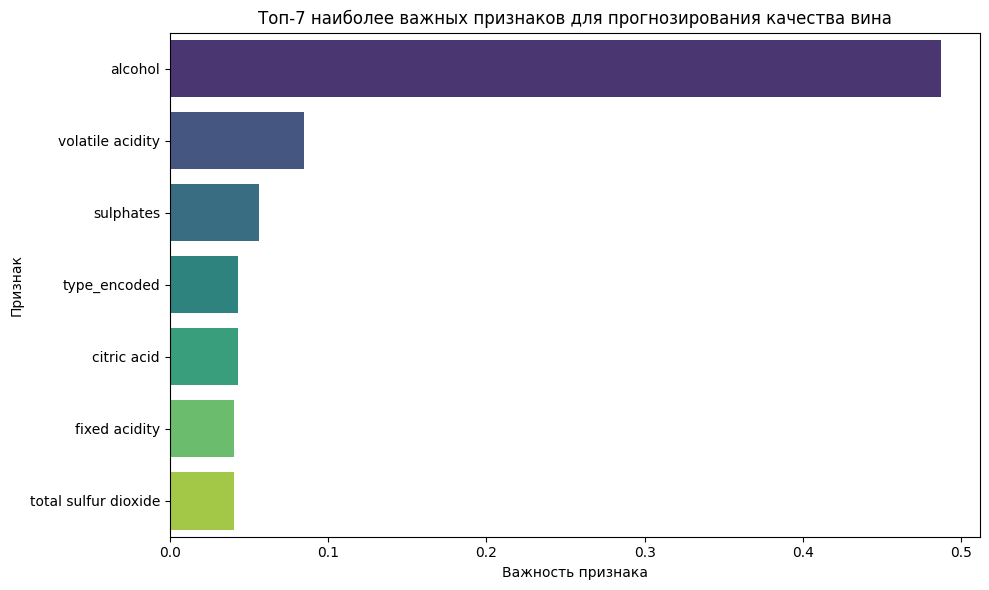

Топ-7 наиболее важных признаков:
                 feature  importance
10               alcohol    0.487360
1       volatile acidity    0.084917
9              sulphates    0.056310
13          type_encoded    0.043033
2            citric acid    0.042927
0          fixed acidity    0.040765
6   total sulfur dioxide    0.040600


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Извлечение важности признаков
feature_importances = optimized_gbr_model.feature_importances_

# 2. Создание DataFrame с названиями признаков и их важностью
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})

# 3. Сортировка DataFrame по важности признаков в убывающем порядке
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# 4. Выбор 7 наиболее важных признаков для визуализации
top_7_features = feature_importance_df.head(7)

# 5. Создание горизонтальной столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_7_features, palette='viridis')

# 6. Добавление заголовка и подписей осей
plt.title('Топ-7 наиболее важных признаков для прогнозирования качества вина')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()

print("Топ-7 наиболее важных признаков:")
print(top_7_features)

## Генерация новых признаков

На основе анализа важности признаков и доменных знаний, рассмотрим возможность создания новых признаков для улучшения прогностической силы модели.


In [15]:
df_features['acidity_ratio'] = df_features['volatile acidity'] / df_features['fixed acidity']
df_features['sulfur_ratio'] = df_features['free sulfur dioxide'] / df_features['total sulfur dioxide']
df_features['alcohol_density'] = df_features['alcohol'] * df_features['density']
df_features['total_acidity'] = df_features['fixed acidity'] + df_features['volatile acidity']
df_features['sugar_alcohol'] = df_features['residual sugar'] * df_features['alcohol']

print("Новые признаки успешно созданы и добавлены в df_features.")
print(df_features.head())

Новые признаки успешно созданы и добавлены в df_features.
    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white       4.345721          0.156850     0.698162       10.885494   
1    red      11.000515          0.684490     0.536096        1.510559   
2  white       7.457916          0.694699     0.309528        7.063783   
3  white       9.594278          0.801173     0.813795        3.121086   
4  white      13.983231          0.898700     0.684731        1.735812   

   chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  \
0   0.039104             4.991145             17.580675  1.000382  3.765822   
1   0.013715            67.868081            234.690939  0.999584  3.232498   
2   0.035401            61.981226             22.473108  0.990513  3.111816   
3   0.091626            65.014908            139.911120  0.996825  3.306142   
4   0.068999            69.648640            180.174525  0.997604  3.239512   

   sulphates    alcoho

## Повторное обучение и оценка с новыми признаками



In [16]:
from sklearn.model_selection import train_test_split

X_new = df_features.drop('quality', axis=1)
y_new = df_features['quality']

X_new = pd.get_dummies(X_new, columns=['type'], drop_first=True)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

print("Размерность X_train_new:", X_train_new.shape)
print("Размерность X_test_new:", X_test_new.shape)
print("Размерность y_train_new:", y_train_new.shape)
print("Размерность y_test_new:", y_test_new.shape)

print("Первые 5 строк X_train_new с новыми признаками и кодированием:")
print(X_train_new.head())

Размерность X_train_new: (160, 17)
Размерность X_test_new: (40, 17)
Размерность y_train_new: (160,)
Размерность y_test_new: (40,)
Первые 5 строк X_train_new с новыми признаками и кодированием:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
79        5.512730          0.410040     0.258244       13.002379   0.093558   
197       6.374031          0.185508     0.581238       17.978548   0.036101   
38        7.999926          0.621591     0.450544        9.063131   0.026485   
24        6.507287          1.150352     0.838329       11.702226   0.069530   
122       5.030422          0.200327     0.370472        7.003234   0.139415   

     free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
79             38.347394            152.308204  1.000934  3.640872   0.889353   
197             8.215181            121.238571  0.992703  2.988025   0.744208   
38             34.160474             27.327618  0.993629  3.167759   0.648779   
24

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error

optimized_gbr_model_new_features = GradientBoostingRegressor(random_state=42, **best_params)
optimized_gbr_model_new_features.fit(X_train_new, y_train_new)

y_train_pred_new = optimized_gbr_model_new_features.predict(X_train_new)
y_test_pred_new = optimized_gbr_model_new_features.predict(X_test_new)

optimized_metrics_new_features = {
    'Train R²': r2_score(y_train_new, y_train_pred_new),
    'Test R²': r2_score(y_test_new, y_test_pred_new),
    'Train MAE': mean_absolute_error(y_train_new, y_train_pred_new),
    'Test MAE': mean_absolute_error(y_test_new, y_test_pred_new)
}

print("Optimized Gradient Boosting Model with New Features Performance:")
for metric, value in optimized_metrics_new_features.items():
    print(f"{metric}: {value:.4f}")

optimized_r2_new_features = optimized_metrics_new_features['Test R²']
optimized_mae_new_features = optimized_metrics_new_features['Test MAE']

comparison_data['Model'].append('Optimized Gradient Boosting with New Features')
comparison_data['Test R²'].append(optimized_r2_new_features)
comparison_data['Test MAE'].append(optimized_mae_new_features)

comparison_df = pd.DataFrame(comparison_data)
print("\nComparison DataFrame after Optimized Model with New Features:")
print(comparison_df)

Optimized Gradient Boosting Model with New Features Performance:
Train R²: 0.8925
Test R²: 0.3799
Train MAE: 0.1607
Test MAE: 0.3588

Comparison DataFrame after Optimized Model with New Features:
                                           Model   Test R²  Test MAE
0                     Baseline Gradient Boosting  0.396100  0.528600
1                     Improved Gradient Boosting  0.134900  0.272300
2                       Custom Gradient Boosting  0.216300  0.458000
3                     Baseline Gradient Boosting  0.069923  0.271375
4                    Optimized Gradient Boosting  0.205641  0.260618
5  Optimized Gradient Boosting with New Features  0.379944  0.358841


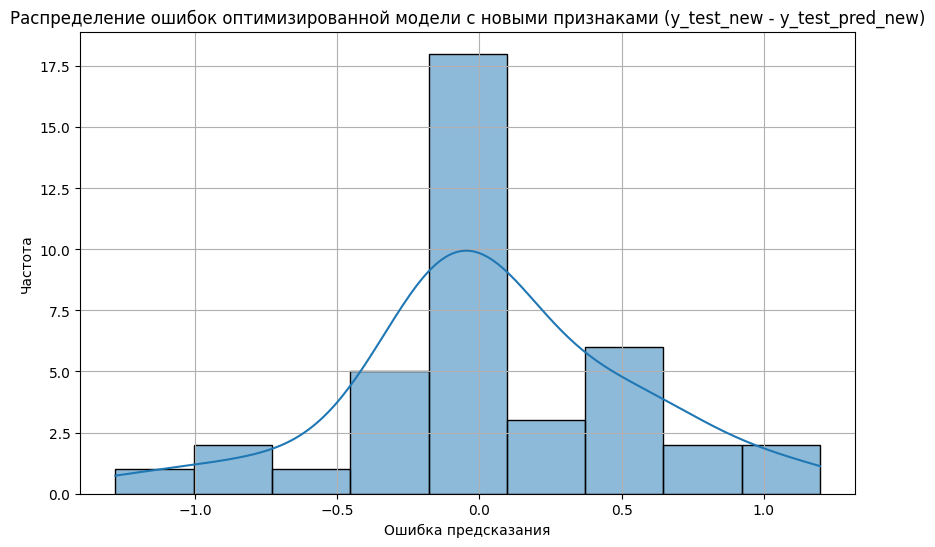

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

errors_new_features = y_test_new - y_test_pred_new

plt.figure(figsize=(10, 6))
sns.histplot(errors_new_features, kde=True)
plt.title('Распределение ошибок оптимизированной модели с новыми признаками (y_test_new - y_test_pred_new)')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

## Имплементация базового решающего дерева


In [19]:
import numpy as np
import pandas as pd

class DecisionStump:
    def __init__(self):
        self.feature_idx = None
        self.threshold = None
        self.left_value = None
        self.right_value = None
        self.best_mse = float('inf')

    def _calculate_mse(self, y):
        if len(y) == 0:
            return 0, 0
        prediction = np.mean(y)
        mse = np.mean((y - prediction)**2)
        return mse, prediction

    def fit(self, X, y):
        n_samples, n_features = X.shape

        for feature_idx in range(n_features):
            feature_values = X.iloc[:, feature_idx]
            thresholds = np.unique(feature_values)

            for threshold in thresholds:
                left_indices = feature_values <= threshold
                right_indices = feature_values > threshold

                y_left = y[left_indices]
                y_right = y[right_indices]

                mse_left, pred_left = self._calculate_mse(y_left)

                mse_right, pred_right = self._calculate_mse(y_right)

                n_left = len(y_left)
                n_right = len(y_right)
                total_samples = n_left + n_right

                if total_samples == 0:
                    current_mse = float('inf')
                else:
                    current_mse = (n_left * mse_left + n_right * mse_right) / total_samples

                if current_mse < self.best_mse:
                    self.best_mse = current_mse
                    self.feature_idx = feature_idx
                    self.threshold = threshold
                    self.left_value = pred_left
                    self.right_value = pred_right

        print(f"Decision Stump fitted: Best Feature Index = {self.feature_idx}, Threshold = {self.threshold}, Left Value = {self.left_value:.4f}, Right Value = {self.right_value:.4f}, MSE = {self.best_mse:.4f}")

    def predict(self, X):
        if self.feature_idx is None:
            raise RuntimeError("DecisionStump has not been fitted yet.")

        predictions = np.zeros(len(X))
        feature_values = X.iloc[:, self.feature_idx]

        left_indices = feature_values <= self.threshold
        right_indices = feature_values > self.threshold

        predictions[left_indices] = self.left_value
        predictions[right_indices] = self.right_value

        return predictions

print("DecisionStump class defined successfully.")

DecisionStump class defined successfully.


## Инициализация модели градиентного бустинга



In [20]:
initial_prediction = y_train_new.mean()
print(f"Начальное константное предсказание (среднее значение y_train_new): {initial_prediction:.4f}")

Начальное константное предсказание (среднее значение y_train_new): 3.5562


## Реализация итеративного процесса бустинга



In [21]:
import numpy as np
import pandas as pd

class CustomGradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, base_learner=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.base_learner = base_learner if base_learner is not None else DecisionStump
        self.stumps = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = y.mean()

        self.predictions = np.full_like(y, self.initial_prediction, dtype=float)

        for i in range(self.n_estimators):
            residuals = y - self.predictions

            stump = self.base_learner()
            stump.fit(X, residuals)
            self.stumps.append(stump)
            stump_predictions = stump.predict(X)
            self.predictions += self.learning_rate * stump_predictions

        print(f"Custom Gradient Boosting Regressor trained with {self.n_estimators} estimators.")

    def predict(self, X):
        if self.initial_prediction is None:
            raise RuntimeError("Model has not been fitted yet.")
        final_predictions = np.full(len(X), self.initial_prediction, dtype=float)
        for stump in self.stumps:
            final_predictions += self.learning_rate * stump.predict(X)

        return final_predictions

print("CustomGradientBoostingRegressor class defined successfully.")

CustomGradientBoostingRegressor class defined successfully.


## Оценка  модели


In [23]:
print("\n--- Сравнение всех моделей ---")
print(comparison_df)

print("\n\nРезюме результатов:\n")
best_r2_model = comparison_df.loc[comparison_df['Test R²'].idxmax()]
print(f"Лучшая модель по Test R²: {best_r2_model['Model']} (R²: {best_r2_model['Test R²']:.4f}, MAE: {best_r2_model['Test MAE']:.4f})")

best_mae_model = comparison_df.loc[comparison_df['Test MAE'].idxmin()]
print(f"Лучшая модель по Test MAE: {best_mae_model['Model']} (R²: {best_mae_model['Test R²']:.4f}, MAE: {best_mae_model['Test MAE']:.4f})")


--- Сравнение всех моделей ---
                                           Model   Test R²  Test MAE
0                     Baseline Gradient Boosting  0.396100  0.528600
1                     Improved Gradient Boosting  0.134900  0.272300
2                       Custom Gradient Boosting  0.216300  0.458000
3                     Baseline Gradient Boosting  0.069923  0.271375
4                    Optimized Gradient Boosting  0.205641  0.260618
5  Optimized Gradient Boosting with New Features  0.379944  0.358841


Резюме результатов:

Лучшая модель по Test R²: Baseline Gradient Boosting (R²: 0.3961, MAE: 0.5286)
Лучшая модель по Test MAE: Optimized Gradient Boosting (R²: 0.2056, MAE: 0.2606)


# Классификация задержек рейсов

In [5]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("shubhamsingh42/flight-delay-dataset-2018-2024")

print("Path to dataset files:", path)
print(os.listdir(path))

df = pd.read_csv(path + '/flight_data_2018_2024.csv')

df = df[[
    'Year',
    'Month',
    'DayofMonth',
    'DayOfWeek',
    'IATA_Code_Marketing_Airline',
    'Flight_Number_Marketing_Airline',
    'IATA_Code_Operating_Airline',
    'Origin',
    'OriginCityName',
    'OriginStateName',
    'DepTime',
    'DepDelayMinutes',
    'Dest',
    'DestCityName',
    'DestStateName',
    'ArrDel15',
    'Cancelled',
    'DistanceGroup'

]]

df.head()

Using Colab cache for faster access to the 'flight-delay-dataset-2018-2024' dataset.
Path to dataset files: /kaggle/input/flight-delay-dataset-2018-2024
['flight_data.parquet', 'flight_data_2018_2024.csv', 'readme.html']


/tmp/ipython-input-344857333.py:14: DtypeWarning: Columns (11,13,86,93,94,101) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + '/flight_data_2018_2024.csv')


,Year,Month,DayofMonth,DayOfWeek,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,IATA_Code_Operating_Airline,Origin,OriginCityName,OriginStateName,DepTime,DepDelayMinutes,Dest,DestCityName,DestStateName,ArrDel15,Cancelled,DistanceGroup
0,2024,1,14,7,UA,4432,G7,MHT,"Manchester, NH",New Hampshire,1849.0,71.0,EWR,"Newark, NJ",New Jersey,1.0,0.0,1
1,2024,1,14,7,UA,4430,G7,IAD,"Washington, DC",Virginia,814.0,0.0,EWR,"Newark, NJ",New Jersey,1.0,0.0,1
2,2024,1,14,7,UA,4429,G7,EWR,"Newark, NJ",New Jersey,1654.0,74.0,MHT,"Manchester, NH",New Hampshire,1.0,0.0,1
3,2024,1,14,7,UA,4428,G7,STL,"St. Louis, MO",Missouri,630.0,0.0,ORD,"Chicago, IL",Illinois,1.0,0.0,2
4,2024,1,14,7,UA,4427,G7,STL,"St. Louis, MO",Missouri,1333.0,33.0,IAD,"Washington, DC",Virginia,1.0,0.0,3


In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np

# Подготовка данных
# Отбрасываем 'Cancelled', так как она сильно коррелирует с ArrDel15 и может привести к утечке данных для базовой модели
X = df.drop(['ArrDel15', 'Cancelled', 'Flight_Number_Marketing_Airline'], axis=1)
y = df['ArrDel15']

# *** НАЧАЛО ИСПРАВЛЕНИЯ ***
# Удаление строк, где целевая переменная 'ArrDel15' является NaN
df_cleaned = df.dropna(subset=['ArrDel15'])
X = df_cleaned.drop(['ArrDel15', 'Cancelled', 'Flight_Number_Marketing_Airline'], axis=1)
y = df_cleaned['ArrDel15']
# *** КОНЕЦ ИСПРАВЛЕНИЯ ***

# Обработка пропущенных значений (например, заполняем медианой для DepTime и DepDelayMinutes)
X['DepTime'].fillna(X['DepTime'].median(), inplace=True)
X['DepDelayMinutes'].fillna(X['DepDelayMinutes'].median(), inplace=True)

# Определение категориальных признаков для One-Hot Encoding
categorical_features = [
    'IATA_Code_Marketing_Airline', 'IATA_Code_Operating_Airline',
    'Origin', 'OriginCityName', 'OriginStateName',
    'Dest', 'DestCityName', 'DestStateName'
]

# Применяем One-Hot Encoding к категориальным признакам
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Разделение данных на обучающую и тестовую выборки
X_train_flight, X_test_flight, y_train_flight, y_test_flight = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # stratify для сбалансированного распределения классов
)

# Инициализация модели градиентного бустинга для классификации (baseline)
baseline_classifier = GradientBoostingClassifier(random_state=42)

# Обучение модели
baseline_classifier.fit(X_train_flight, y_train_flight)

# Прогнозирование на тестовом наборе
y_pred_flight = baseline_classifier.predict(X_test_flight)
y_proba_flight = baseline_classifier.predict_proba(X_test_flight)[:, 1] # Вероятности для ROC AUC

# Оценка производительности
accuracy = accuracy_score(y_test_flight, y_pred_flight)
precision = precision_score(y_test_flight, y_pred_flight)
recall = recall_score(y_test_flight, y_pred_flight)
f1 = f1_score(y_test_flight, y_pred_flight)
roc_auc = roc_auc_score(y_test_flight, y_proba_flight)

print("\nBaseline Gradient Boosting Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Optionally, add these metrics to a comparison DataFrame if it exists
if 'comparison_data' not in globals():
    comparison_data = {'Model': [], 'Test Accuracy': [], 'Test Precision': [], 'Test Recall': [], 'Test F1-Score': [], 'Test ROC AUC': []}

# Check if it's regression or classification and update comparison_data accordingly
if 'Test R²' in globals(): # Check for the presence of a regression-specific metric
    print("\nWarning: Previous comparison data contains regression metrics. Creating new comparison_flight_df.")
    comparison_flight_data = {
        'Model': ['Baseline Gradient Boosting Classifier'],
        'Test Accuracy': [accuracy],
        'Test Precision': [precision],
        'Test Recall': [recall],
        'Test F1-Score': [f1],
        'Test ROC AUC': [roc_auc]
    }
    comparison_flight_df = pd.DataFrame(comparison_flight_data)
    print("\nComparison Flight DataFrame:")
    print(comparison_flight_df)
else: # Assuming this is the first classification model and comparison_data is suitable
    comparison_data['Model'].append('Baseline Gradient Boosting Classifier')
    comparison_data['Test Accuracy'].append(accuracy)
    comparison_data['Test Precision'].append(precision)
    comparison_data['Test Recall'].append(recall)
    comparison_data['Test F1-Score'].append(f1)
    comparison_data['Test ROC AUC'].append(roc_auc)

    comparison_flight_df = pd.DataFrame(comparison_data)
    print("\nComparison Flight DataFrame:")
    print(comparison_flight_df)

/tmp/ipython-input-541024261.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['DepTime'].fillna(X['DepTime'].median(), inplace=True)
/tmp/ipython-input-541024261.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

KeyboardInterrupt: 

## Оптимизация параметров Baseline Gradient Boosting Classifier



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# 1. Define the reduced hyperparameter grid
param_grid_classifier = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

# 2. Create an instance of GradientBoostingClassifier
gbc_model = GradientBoostingClassifier(random_state=42)

# 3. Initialize GridSearchCV
grid_search_classifier = GridSearchCV(estimator=gbc_model,
                                    param_grid=param_grid_classifier,
                                    cv=3, # Using 3-fold cross-validation
                                    scoring='roc_auc', # Using ROC AUC as the evaluation metric for classification
                                    n_jobs=-1, # Use all available cores
                                    verbose=2)

# 4. Run the grid search
grid_search_classifier.fit(X_train_flight, y_train_flight)

# 5. Print the best parameters and best score
print("Лучшие параметры для классификатора:", grid_search_classifier.best_params_)
print("Лучшая оценка (ROC AUC) для классификатора:", grid_search_classifier.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [3]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np

# --- Start of Data Preparation (from cell w_queff1Z5jL) ---
# Make sure 'df' is available from previous steps

# Удаление строк, где целевая переменная 'ArrDel15' является NaN
df_cleaned = df.dropna(subset=['ArrDel15'])
X_flight_raw = df_cleaned.drop(['ArrDel15', 'Cancelled', 'Flight_Number_Marketing_Airline'], axis=1)
y_flight = df_cleaned['ArrDel15']

# Обработка пропущенных значений (например, заполняем медианой для DepTime и DepDelayMinutes)
X_flight_raw['DepTime'].fillna(X_flight_raw['DepTime'].median(), inplace=True)
X_flight_raw['DepDelayMinutes'].fillna(X_flight_raw['DepDelayMinutes'].median(), inplace=True)

# Определение категориальных признаков для One-Hot Encoding
categorical_features = [
    'IATA_Code_Marketing_Airline', 'IATA_Code_Operating_Airline',
    'Origin', 'OriginCityName', 'OriginStateName',
    'Dest', 'DestCityName', 'DestStateName'
]

# Применяем One-Hot Encoding к категориальным признакам
X_flight = pd.get_dummies(X_flight_raw, columns=categorical_features, drop_first=True)

# Разделение данных на обучающую и тестовую выборки
X_train_flight, X_test_flight, y_train_flight, y_test_flight = train_test_split(
    X_flight, y_flight, test_size=0.2, random_state=42, stratify=y_flight # stratify для сбалансированного распределения классов
)
# --- End of Data Preparation ---


# 1. Define the reduced hyperparameter grid
param_grid_classifier = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

# 2. Create an instance of GradientBoostingClassifier
gbc_model = GradientBoostingClassifier(random_state=42)

# 3. Initialize GridSearchCV
grid_search_classifier = GridSearchCV(estimator=gbc_model,
                                    param_grid=param_grid_classifier,
                                    cv=3, # Using 3-fold cross-validation
                                    scoring='roc_auc', # Using ROC AUC as the evaluation metric for classification
                                    n_jobs=-1, # Use all available cores
                                    verbose=2)

# 4. Run the grid search
grid_search_classifier.fit(X_train_flight, y_train_flight)

# 5. Print the best parameters and best score
print("Лучшие параметры для классификатора:", grid_search_classifier.best_params_)
print("Лучшая оценка (ROC AUC) для классификатора:", grid_search_classifier.best_score_)

/tmp/ipython-input-3453198311.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_flight_raw['DepTime'].fillna(X_flight_raw['DepTime'].median(), inplace=True)
/tmp/ipython-input-3453198311.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

Fitting 3 folds for each of 8 candidates, totalling 24 fits


KeyboardInterrupt: 

In [4]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np

# --- Start of Data Preparation (from cell w_queff1Z5jL) ---
# Make sure 'df' is available from previous steps

# Удаление строк, где целевая переменная 'ArrDel15' является NaN
df_cleaned = df.dropna(subset=['ArrDel15'])
X_flight_raw = df_cleaned.drop(['ArrDel15', 'Cancelled', 'Flight_Number_Marketing_Airline'], axis=1)
y_flight = df_cleaned['ArrDel15']

# Обработка пропущенных значений (например, заполняем медианой для DepTime и DepDelayMinutes)
X_flight_raw['DepTime'] = X_flight_raw['DepTime'].fillna(X_flight_raw['DepTime'].median())
X_flight_raw['DepDelayMinutes'] = X_flight_raw['DepDelayMinutes'].fillna(X_flight_raw['DepDelayMinutes'].median())

# Определение категориальных признаков для One-Hot Encoding
categorical_features = [
    'IATA_Code_Marketing_Airline', 'IATA_Code_Operating_Airline',
    'Origin', 'OriginCityName', 'OriginStateName',
    'Dest', 'DestCityName', 'DestStateName'
]

# Применяем One-Hot Encoding к категориальным признакам
X_flight = pd.get_dummies(X_flight_raw, columns=categorical_features, drop_first=True)

# Разделение данных на обучающую и тестовую выборки
X_train_flight, X_test_flight, y_train_flight, y_test_flight = train_test_split(
    X_flight, y_flight, test_size=0.2, random_state=42, stratify=y_flight # stratify для сбалансированного распределения классов
)
# --- End of Data Preparation ---


# 1. Define the reduced hyperparameter grid
param_grid_classifier = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

# 2. Create an instance of GradientBoostingClassifier
gbc_model = GradientBoostingClassifier(random_state=42)

# 3. Initialize GridSearchCV
grid_search_classifier = GridSearchCV(estimator=gbc_model,
                                    param_grid=param_grid_classifier,
                                    cv=3, # Using 3-fold cross-validation
                                    scoring='roc_auc', # Using ROC AUC as the evaluation metric for classification
                                    n_jobs=-1, # Use all available cores
                                    verbose=2)

# 4. Run the grid search
grid_search_classifier.fit(X_train_flight, y_train_flight)

# 5. Print the best parameters and best score
print("Лучшие параметры для классификатора:", grid_search_classifier.best_params_)
print("Лучшая оценка (ROC AUC) для классификатора:", grid_search_classifier.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}
Detailed tracebacks of the workers should have been printed to stderr in the executor process if faulthandler was not disabled.